In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_68390_G')

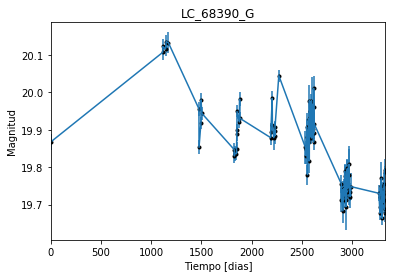

In [2]:
data = np.genfromtxt('LC_68390_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_68390_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

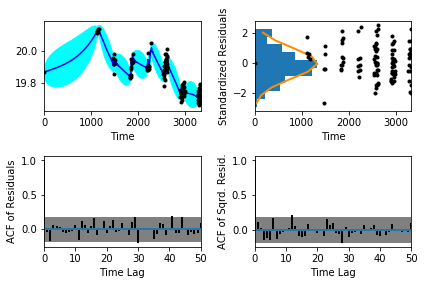

In [5]:
sample.assess_fit()

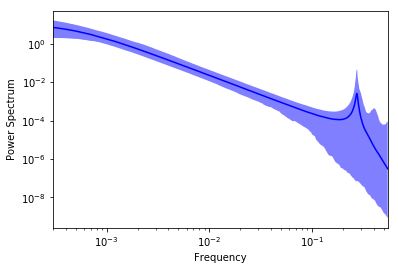

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_68390_G')

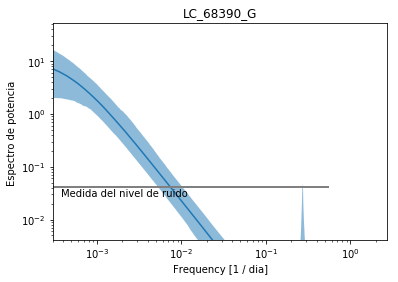

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_68390_G')

Text(0.5,1,'Prediccion , valor esperado 68390_G')

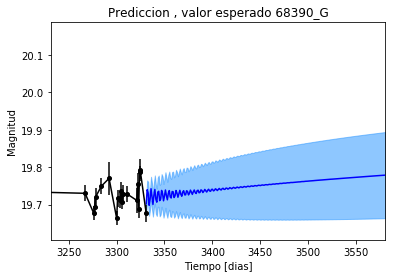

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado 68390_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_68390_G')

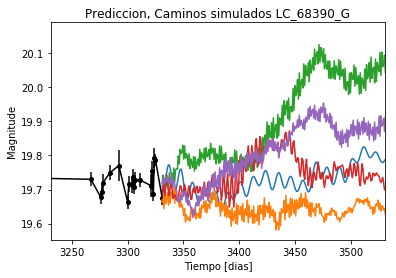

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_68390_G')

Text(0.5,1,'LC_68390_G')

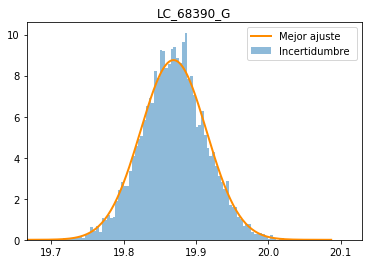

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_68390_G')

Text(0.5,1,'Interpolacion, camino simulado LC_68390_G')

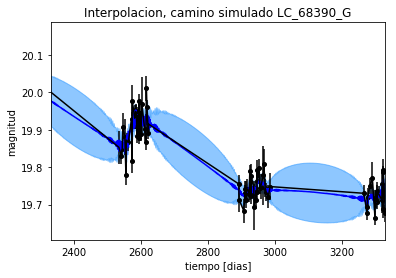

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68390_G')

Text(0.5,1,'Interpolacion, camino simulado LC_68390_G')

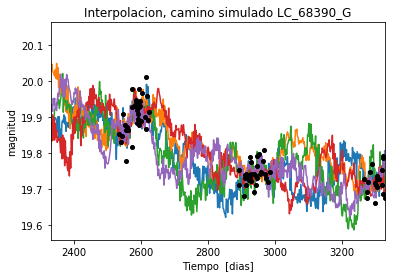

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68390_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1447.95803577
Median: 0.00488280002769
Standard deviation: 0.0573593431153
68% credibility interval: [ 0.00139677  0.01206485]
95% credibility interval: [ 0.0003933   0.04284717]
99% credibility interval: [  3.13087421e-04   4.32691587e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 908.336981546
Median: 0.00484555074133
Standard deviation: 0.0434124638508
68% credibility interval: [ 0.00137117  0.01191523]
95% credibility interval: [ 0.000392    0.03561789]
99% credibility interval: [ 0.00031309  0.18718601]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 179.536458953
Median: 0.320816053741
Standard deviation: 0.296313

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 802.33726274
Median: 267.629582086
Standard deviation: 2.70274118796
68% credibility interval: [ 264.34588994  269.44467138]
95% credibility interval: [ 260.01815947  270.38513874]
99% credibility interval: [ 257.45731093  270.65295763]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 227.231368763
Median: 2.1350819759
Standard deviation: 1.98487889264
68% credibility interval: [ 0.75319613  4.93056224]
95% credibility interval: [ 0.16203553  6.70047444]
99% credibility interval: [ 0.07311107  7.10267605]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 252.785962531
Median: 3.21594973591
Standard deviation: 8.6693506432
68% credibility interval: [  2.92844176  20.9534901 ]
95% credibility interval: [  1.89934743  22.

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19757.8142968
Median: 8.39475551261e-58
Standard deviation: 1.30293209597e+78
68% credibility interval: [  6.26165057e-104   6.72484680e-013]
95% credibility interval: [  5.47162903e-131   1.93222740e+014]
99% credibility interval: [  6.60960721e-132   1.94237663e+046]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 532.937756759
Median: 19.8855668028
Standard deviation: 0.0574527150484
68% credibility interval: [ 19.83005448  19.93822912]
95% credibility interval: [ 19.7651241  19.998904 ]
99% credibility interval: [ 19.73034299  20.06987155]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 169.97635733
Median: 0.274848085568
Standard deviation: 0.194671059817
68% credibility interval: [ 0.26802218  0.72679739]
95% credibility interval: [ 0.13390864  0.7411775 ]
99% credibility interval: [ 0.         0.8737503]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 169.97635733
Median: 0.274848085568
Standard deviation: 0.194671059817
68% credibility interval: [ 0.26802218  0.72679739]
95% credibility interval: [ 0.13390864  0.7411775 ]
99% credibility interval: [ 0.         0.8737503]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2305.90653793
Median: 0.0
Standard deviation: 0.000237569561366
68% credibilit

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 802.33726274
Median: 267.629582086
Standard deviation: 2.70274118796
68% credibility interval: [ 264.34588994  269.44467138]
95% credibility interval: [ 260.01815947  270.38513874]
99% credibility interval: [ 257.45731093  270.65295763]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 823.063126241
Median: 0.0153223257058
Standard deviation: 0.00650653017341
68% credibility interval: [ 0.01072788  0.02241605]
95% credibility interval: [ 0.0077469   0.03190516]
99% credibility interval: [ 0.00621344  0.04114952]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 383.856412998
Median: 1.2592329084
Standard deviation: 0.235819625483
68% credibility interval: [ 1.06859539  1.52358402]
95% credibility interval: [ 0.8975173   1.83737549]
99% credibility interval: [ 0.79974979  1.94843414]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 242.032733425
Median: 0.0672055449316
Standard deviation: 0.333168879723
68% credibility interval: [ 0.02085243  0.34409489]
95% credibility interval: [  7.44246019e-16   1.18106878e+00]
99% credibility interval: [  1.11666823e-47   1.66301298e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1447.95803577
Median: (-0.0306795373919-1.67554985687j)
Standard deviation: 1.2751447999
68% credibility interval: [-0.07580571-3.71942768j -0.00877618-4.62120832j]
95% credibility interval: [-0.26921672-0.98856234j -0.00247119-1.72396991j]
99% credibility interval: [ -2.71868142e+00-6.31318236j  -1.96718628e-03-1.69166509j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 908.336981546
Median: (-0.0304454932231+4.58278660428j)
Standard deviation: 1.25319959737
68% credibility interval: [-0.07486560+1.77246754j -0.00861532+1.67017974j]
95% credibility interval: [-0.2237938+2.81941667j -0.0024630+1.70641271j]
99% credibility interval: [-1.17612436+3.22113215j -0.00196719+1.69166509j]
Posterior summary for parameter ar_ro